<IPython.core.display.Javascript object>


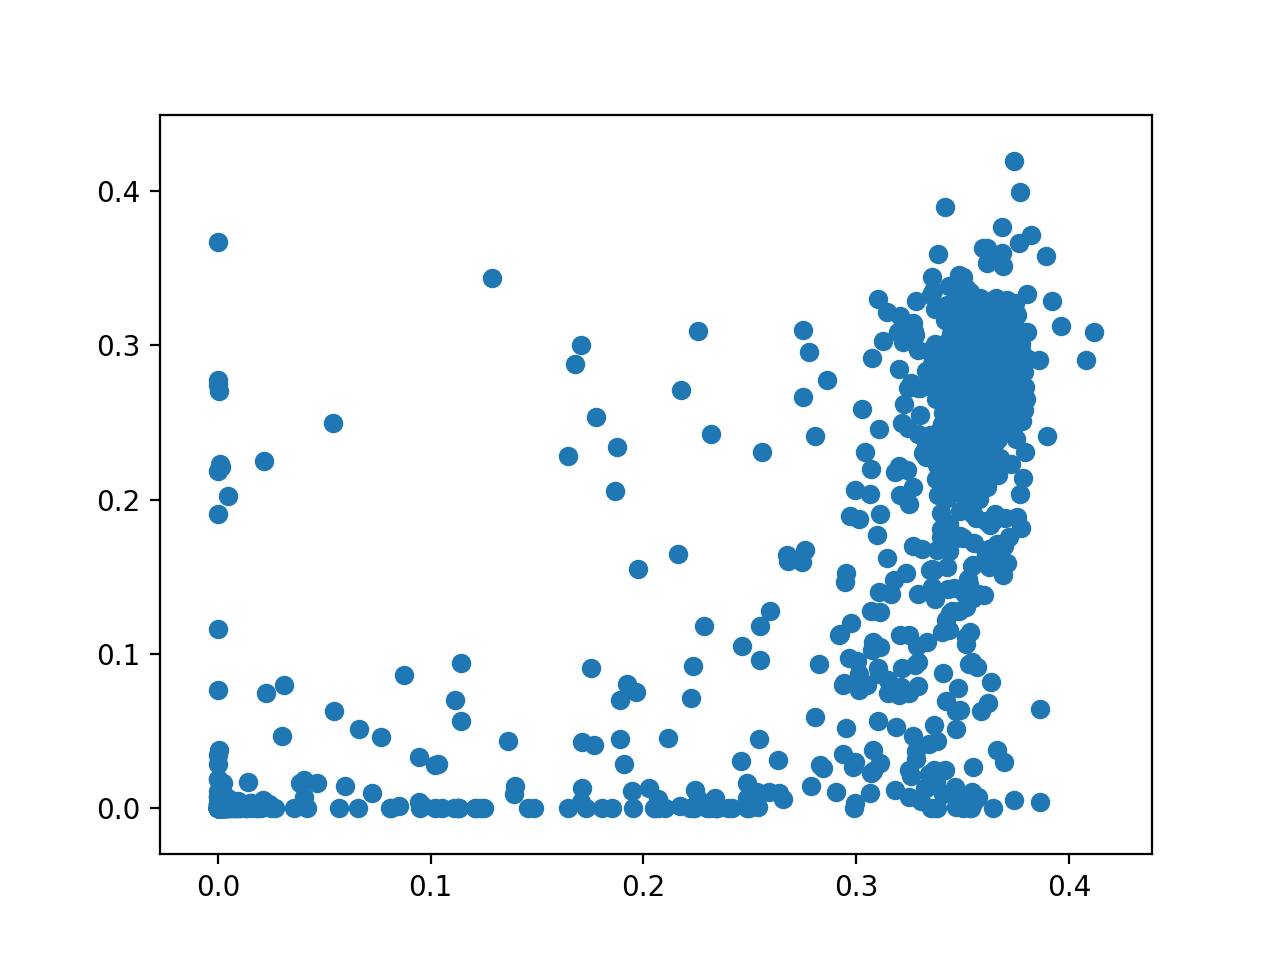

In [2]:
%matplotlib notebook

#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri May 15 13:14:03 2020

@author: Jake
"""

#%% NOTES

# Dimension 0 is Row
# Dimension 1 is Col
# Dimension 2 is Plate
# Dimension 3 is Replicate

#%% Import python libraries

import pickle
import matplotlib.pyplot as pyplot

#%% Load the Screen_Master structure
with open('Screen_Master.pickle', 'rb') as f:
    Screen_Master  = pickle.load(f);
f.close()

#%% Load the Prestwick Indexed structure
with open('Prestwick Indexed.pickle', 'rb') as f:
    Prestwick_Indexed  = pickle.load(f);
f.close()

#%% Build the list of compound names

Compound_Names = Prestwick_Indexed['96 Format']['Chemical name'].loc[:, 1:10, :]

#%% Make the scatter plot

Fig_handle, Ax_handle = pyplot.subplots();

Scatter_handle = pyplot.scatter(Screen_Master['Flat']['Low Arabinose']['OD Mean'], \
                  Screen_Master['Flat']['High Arabinose']['OD Mean']);
    
cmap = pyplot.cm.RdYlGn

#%% Annotate the scatter plot

# Create the annotation object
annot = Ax_handle.annotate("", xy=(0,0), xytext=(20,20),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
annot.set_visible(False)

# Define the annotation functions
def update_annot(ind):

    pos = Scatter_handle.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    
    text = Compound_Names[ind["ind"][0]]
    #text = "{}".format(" ".join(list(map(str,ind["ind"]))))
    annot.set_text(text)
    #annot.get_bbox_patch().set_facecolor(cmap(norm(c[ind["ind"][0]])))
    #annot.get_bbox_patch().set_alpha(0.4)

def hover(event):
    vis = annot.get_visible()
    if event.inaxes == Ax_handle:
        cont, ind = Scatter_handle.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            Fig_handle.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                Fig_handle.canvas.draw_idle()

Fig_handle.canvas.mpl_connect("motion_notify_event", hover)

pyplot.show()
